In [1]:
import numpy as np
from QAM_EncoderDecoder import * 
import commpy
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
%matplotlib inline

N = 1024
prefix_no = 32
fs = 441000

## 1. Generate random symbols

In [2]:
random_symbol = np.random.randint(0,100, int(50/4))
random_symbol

array([86, 35, 76, 39, 41, 46, 95, 38,  5, 63, 34, 95])

In [29]:
bin_strings=''
for byte in random_symbol:
    binary_string = '{0:08b}'.format(byte)
    bin_strings+=binary_string
bin_strings

'010101100010001101001100001001110010100100101110010111110010011000000101001111110010001001011111'

In [65]:
symbols = encode_bitstr2symbols(bin_strings)
len(symbols)

about to do encode_bitstr2symbols encoding
encode_bitstr2symbols encoding finished


48

In [66]:
#----iDFT----
frames=np.fft.ifft(symbols)
        

# ----add cyclic prefix----
cyclic_prefix = frames[len(symbols)-prefix_no:len(symbols)]
        
frames = np.append(cyclic_prefix, frames, axis=0)        

In [67]:
frames.shape

(80,)

##  2 Convolv with a simple channel:


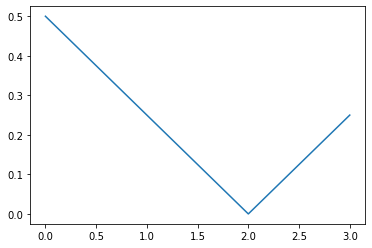

In [68]:
sim_channel = np.array([0.5, 0.25, 0.0, 0.25])
plt.plot(sim_channel)

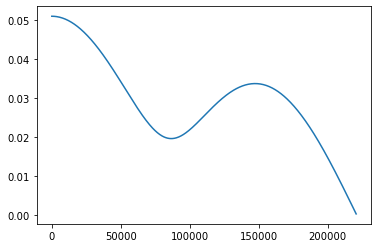

In [69]:
chan_fft = np.fft.fft(sim_channel, 1024)
chan_fft /= np.linalg.norm(chan_fft)
plt.plot(np.linspace(0,fs/2,int(N/2)),np.abs(chan_fft)[0:int(N/2)])

In [70]:
frames.shape

(80,)

In [71]:
channel_out = np.convolve(frames, sim_channel)

In [72]:
channel_out.shape

(83,)

C:\Users\H1937\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


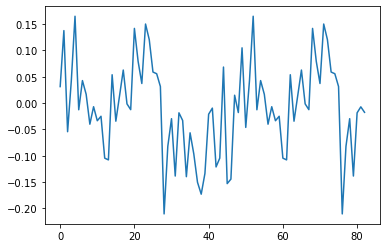

In [73]:
plt.plot(channel_out)

C:\Users\H1937\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


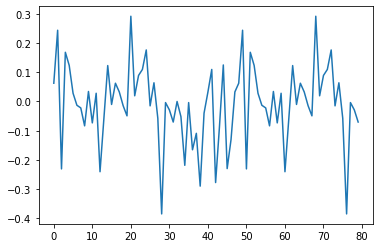

In [74]:
plt.plot(frames)

## 3. Decode the received audio

In [75]:
recorded = channel_out[32:48+32]
recorded.shape

(48,)

In [76]:
recorded_frequency = np.fft.fft(recorded)

In [77]:
freq_response = recorded_frequency / np.array(symbols)
freq_response

array([1.00000000e+00-0.00000000e+00j, 9.78831098e-01-1.28302406e-01j,
       9.18258152e-01-2.41481457e-01j, 8.26640741e-01-3.26640741e-01j,
       7.16506351e-01-3.75000000e-01j, 6.02667477e-01-3.83160240e-01j,
       5.00000000e-01-3.53553391e-01j, 4.21220474e-01-2.94009193e-01j,
       3.75000000e-01-2.16506351e-01j, 3.64700975e-01-1.35299025e-01j,
       3.87928066e-01-6.47047613e-02j, 4.36960690e-01-1.68913322e-02j,
       5.00000000e-01+5.55111512e-17j, 5.63039310e-01-1.68913322e-02j,
       6.12071934e-01-6.47047613e-02j, 6.35299025e-01-1.35299025e-01j,
       6.25000000e-01-2.16506351e-01j, 5.78779526e-01-2.94009193e-01j,
       5.00000000e-01-3.53553391e-01j, 3.97332523e-01-3.83160240e-01j,
       2.83493649e-01-3.75000000e-01j, 1.73359259e-01-3.26640741e-01j,
       8.17418481e-02-2.41481457e-01j, 2.11689015e-02-1.28302406e-01j,
       2.77555756e-17-8.32667268e-17j, 2.11689015e-02+1.28302406e-01j,
       8.17418481e-02+2.41481457e-01j, 1.73359259e-01+3.26640741e-01j,
      

In [78]:
impulse_channel = np.fft.ifft(freq_response)
impulse_channel

array([ 5.00000000e-01+0.00000000e+00j,  2.50000000e-01+4.04768811e-18j,
       -3.78630664e-19-4.34549892e-18j,  2.50000000e-01+4.04768811e-18j,
       -2.71550862e-18-1.09091124e-17j,  1.35293742e-18-4.53693617e-19j,
       -2.16875688e-17-2.86214771e-18j,  5.12113873e-18-1.86171405e-17j,
       -3.36158562e-18+1.06144297e-17j, -1.26382738e-17-2.56790659e-34j,
       -7.96353073e-18-2.99210417e-17j, -2.72077262e-17-2.93272164e-18j,
        1.67689936e-17-5.20417043e-18j, -1.27213055e-17+4.04768811e-18j,
       -1.26582000e-18-1.73460165e-17j, -3.46944695e-18+7.51713506e-18j,
        1.29952302e-17+8.67361738e-19j, -1.80277752e-17-4.62592927e-18j,
        6.99202449e-18+1.73011548e-17j,  4.20151495e-17+4.70896096e-18j,
        3.29374978e-18-9.90756932e-18j,  1.13683681e-17+2.35833400e-17j,
       -2.06190521e-20-7.47306736e-18j, -1.09035503e-17-1.26078821e-17j,
       -2.77555756e-17+1.04083409e-17j, -4.62592927e-18-5.20417043e-18j,
       -1.39224591e-17+1.08610909e-17j, -2.31296463

In [79]:
impulse_channel[0:4]

array([ 5.00000000e-01+0.00000000e+00j,  2.50000000e-01+4.04768811e-18j,
       -3.78630664e-19-4.34549892e-18j,  2.50000000e-01+4.04768811e-18j])

In [80]:
print(np.linalg.norm(impulse_channel[0]),np.linalg.norm(impulse_channel[1]), np.linalg.norm(impulse_channel[2]), np.linalg.norm(impulse_channel[3]))

0.4999999999999999 0.24999999999999992 4.36196309027217e-18 0.25


In [81]:
sim_channel

array([0.5 , 0.25, 0.  , 0.25])